In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

df = pd.read_csv('Pakistan_floods-Losses.csv')
print(df.head())

          area                 item     amount [t]  absolute_losses [t]  \
0  Afghanistan                Abaca       0.000000             0.000000   
1  Afghanistan    Alcohol, Non-Food    2024.788778             0.697027   
2  Afghanistan  Apples and products  273405.082218            -0.054199   
3  Afghanistan                Asses       0.000000             0.000000   
4  Afghanistan              Bananas   97000.991410             0.000000   

   relative_losses  al/capita [kg]  
0     0.000000e+00        0.000000  
1     3.441284e-04        0.000018  
2    -1.982368e-07       -0.000001  
3     0.000000e+00        0.000000  
4     0.000000e+00        0.000000  


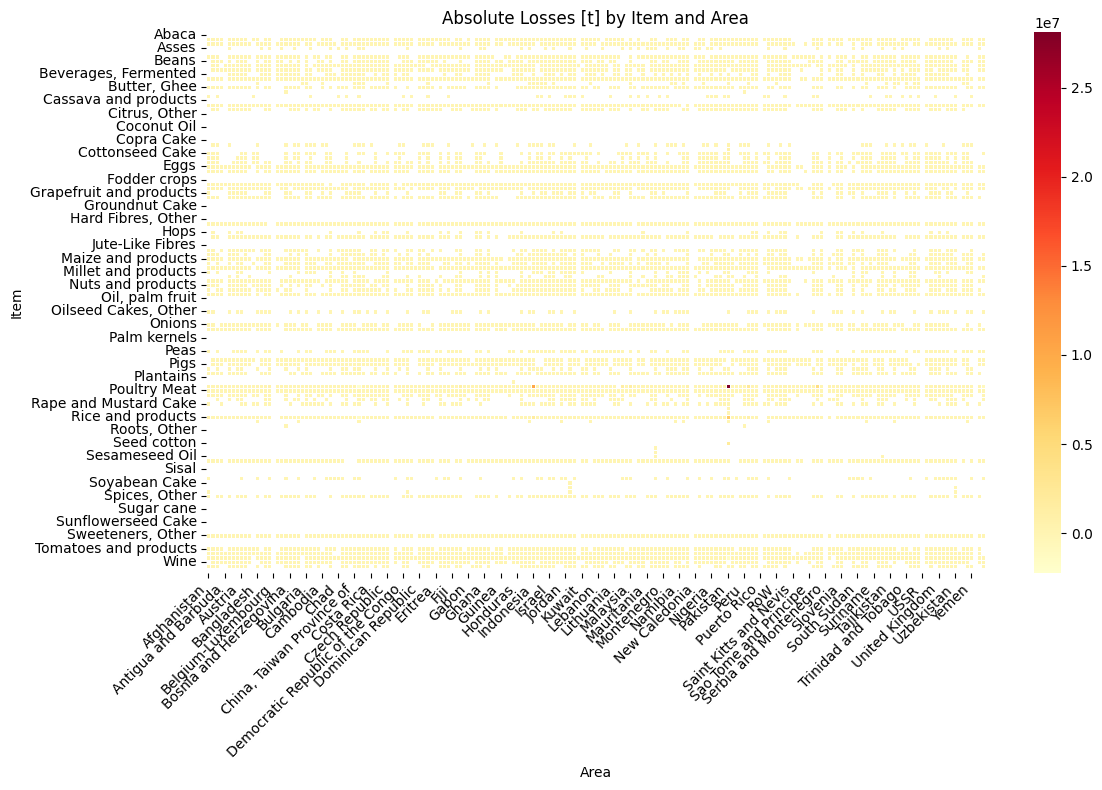

In [4]:
pivot_table = df.pivot_table(
    index='item',
    columns='area',
    values='absolute_losses [t]',
    aggfunc='sum',
    fill_value=0
)

# Replace zeros with NaN
masked_data = pivot_table.replace(0, np.nan)
cmap = sns.color_palette("YlOrRd", as_cmap=True)
cmap.set_bad(color='white')

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(masked_data, cmap=cmap, linewidths=0.5)
plt.title("Absolute Losses [t] by Item and Area")
plt.xlabel("Area")
plt.ylabel("Item")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

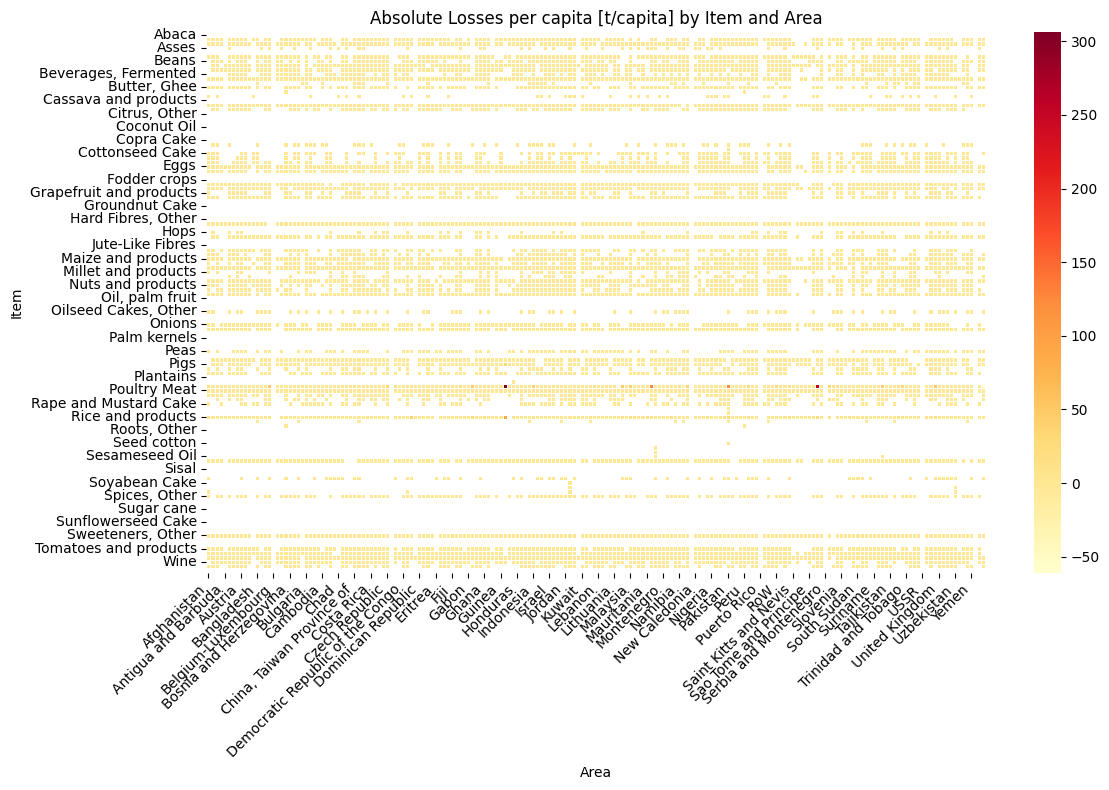

In [5]:
pivot_table = df.pivot_table(
    index='item',
    columns='area',
    values='al/capita [kg]',
    aggfunc='sum',
    fill_value=0
)

# Replace zeros with NaN
masked_data = pivot_table.replace(0, np.nan)
cmap = sns.color_palette("YlOrRd", as_cmap=True)
cmap.set_bad(color='white')

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(masked_data, cmap=cmap, linewidths=0.5)
plt.title("Absolute Losses per capita [t/capita] by Item and Area")
plt.xlabel("Area")
plt.ylabel("Item")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

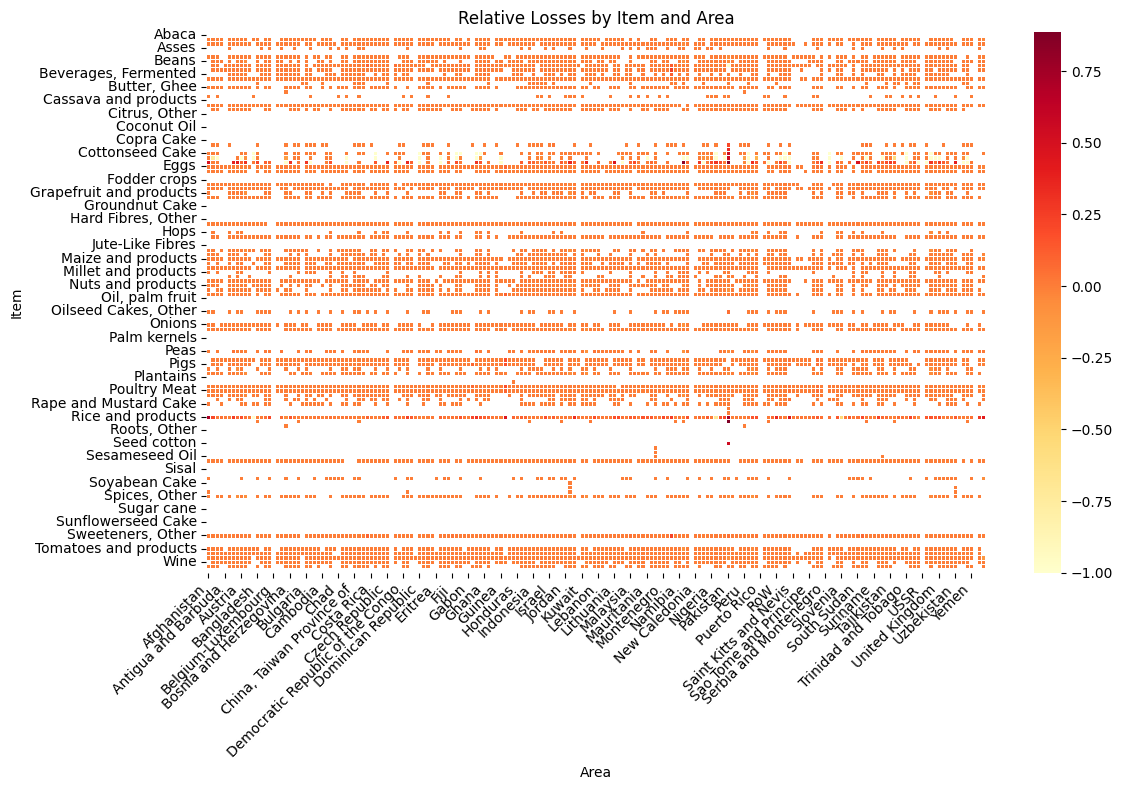

In [6]:
pivot_table = df.pivot_table(
    index='item',
    columns='area',
    values='relative_losses',
    aggfunc='sum',
    fill_value=0
)

# Replace zeros with NaN
masked_data = pivot_table.replace(0, np.nan)
cmap = sns.color_palette("YlOrRd", as_cmap=True)
cmap.set_bad(color='white')

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(masked_data, cmap=cmap, linewidths=0.5)
plt.title("Relative Losses by Item and Area")
plt.xlabel("Area")
plt.ylabel("Item")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

<ipython-input-7-1183310460>:24: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


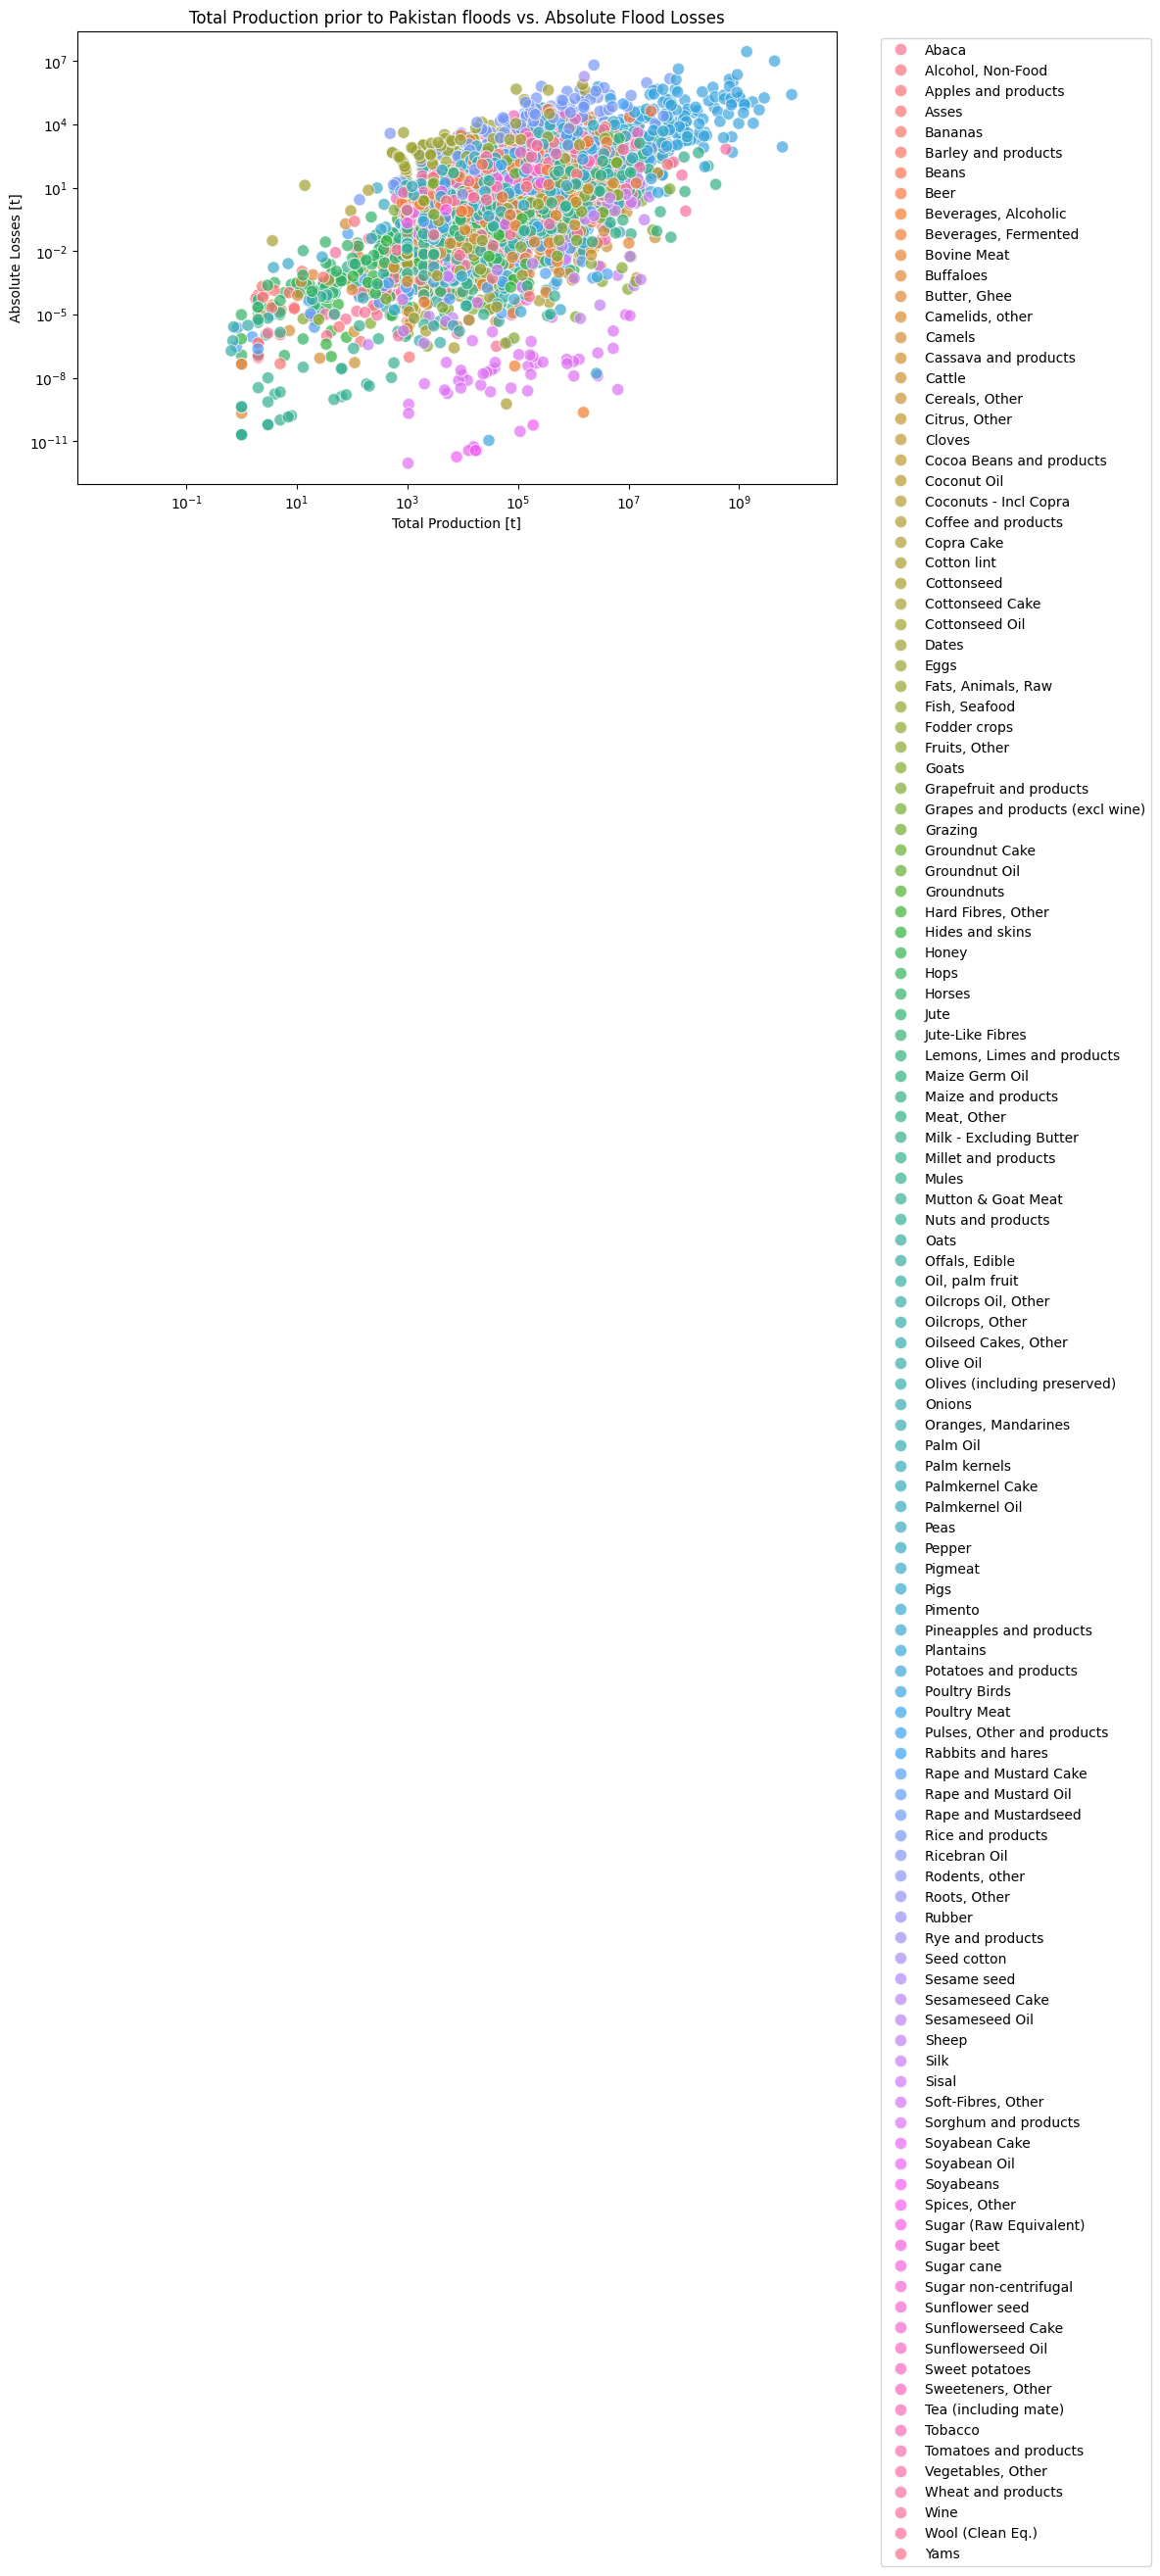

In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('Pakistan_floods-Losses.csv')

plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=df,
    x='amount [t]',
    y='absolute_losses [t]',
    hue='item',
    alpha=0.7,
    edgecolor='w',
    s=80
)
plt.title("Total Production prior to Pakistan floods vs. Absolute Flood Losses")
plt.xlabel("Total Production [t]")
plt.ylabel("Absolute Losses [t]")
plt.xscale('log')  # Log scale helps if data spans wide ranges
plt.yscale('log')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', ncol=1)
plt.tight_layout()
plt.show()

In [14]:
import pandas as pd
import plotly.express as px
df = pd.read_csv('Pakistan_floods-Losses.csv')
df_rice = df[df['item'] == 'Rice and products']
rice_losses_by_country = df_rice.groupby('area')['absolute_losses [t]'].sum().reset_index()

# Create the choropleth map using plotly.express
fig = px.choropleth(
    rice_losses_by_country,
    locations="area", # Column in the DataFrame containing country names
    locationmode="country names", # Specifies that 'locations' column contains country names
    color="absolute_losses [t]", # Column to determine the color intensity
    hover_name="area", # Information to display on hover
    color_continuous_scale=px.colors.sequential.Plasma, # Color scale for the map
    title="Absolute Losses for 'Rice and products' by Country after the Pakistan Floods", # Title of the map
    projection="natural earth" # Type of map projection
)
fig.show()

In [15]:
import pandas as pd
import plotly.express as px
df = pd.read_csv('Pakistan_floods-Losses.csv')
df_poultry = df[df['item'] == 'Poultry Meat']
poultry_losses_by_country = df_poultry.groupby('area')['absolute_losses [t]'].sum().reset_index()

# Create the choropleth map using plotly.express
fig = px.choropleth(
    poultry_losses_by_country,
    locations="area", # Column in the DataFrame containing country names
    locationmode="country names", # Specifies that 'locations' column contains country names
    color="absolute_losses [t]", # Column to determine the color intensity
    hover_name="area", # Information to display on hover
    color_continuous_scale=px.colors.sequential.Plasma, # Color scale for the map
    title="Absolute Losses for Poultry Meat by Country after the Pakistan Floods", # Title of the map
    projection="natural earth" # Type of map projection
)
fig.show()